In [2]:
pip install pdf2image

  Using cached pdf2image-1.14.0-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
from pdf2image import convert_from_path
import os
from PIL import ImageDraw
from PIL import Image

In [3]:
images = convert_from_path('Mozilla-Trustworthy_AI.pdf',poppler_path=r'C:\poppler-0.68.0\bin',output_folder=r'D:\PYB-Test\Test\Base_test')

In [4]:
images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EB944C0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EB94550>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EBFA8E0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EC0B880>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EC0BA60>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EC0BA90>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EC0BAC0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EC0BAF0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EC0BB20>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EC0BB50>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EC0BB80>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1EA2EC0BBB0>,
 <PI

In [5]:
for i in range(len(images)):
    images[i].save('page'+ str(i) +'.png', 'PNG')

In [6]:
import easyocr
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
img_path = 'page9.png'

In [8]:
reader = easyocr.Reader(['en'],gpu=False)
result = reader.readtext(img_path)

Using CPU. Note: This module is much faster with a GPU.


In [9]:
result

[([[719, 127], [974, 127], [974, 160], [719, 160]],
  'foundation mozilla.org',
  0.38180944323539734),
 ([[244, 264], [530, 264], [530, 312], [244, 312]],
  'Introduction',
  0.905035674571991),
 ([[135, 265], [201, 265], [201, 309], [135, 309]],
  'III.',
  0.5125904679298401),
 ([[246, 401], [762, 401], [762, 452], [246, 452]],
  'What if AI worked differently?',
  0.49310651421546936),
 ([[198, 414], [220, 414], [220, 442], [198, 442]], '', 0.5781769156455994),
 ([[819, 511], [1395, 511], [1395, 555], [819, 555]],
  'particular era shapes what people think is',
  0.45015600323677063),
 ([[766.8713347040338, 513.1625379937149],
   [823.7368735447175, 522.5731937374715],
   [818.1286652959662, 554.8374620062851],
   [761.2631264552825, 546.4268062625285]],
  'any',
  0.7963788509368896),
 ([[199, 514], [767, 514], [767, 553], [199, 553]],
  'The prevailing computing environment of',
  0.2048211395740509),
 ([[195, 554], [871, 554], [871, 595], [195, 595]],
  'possible and, in turn, w

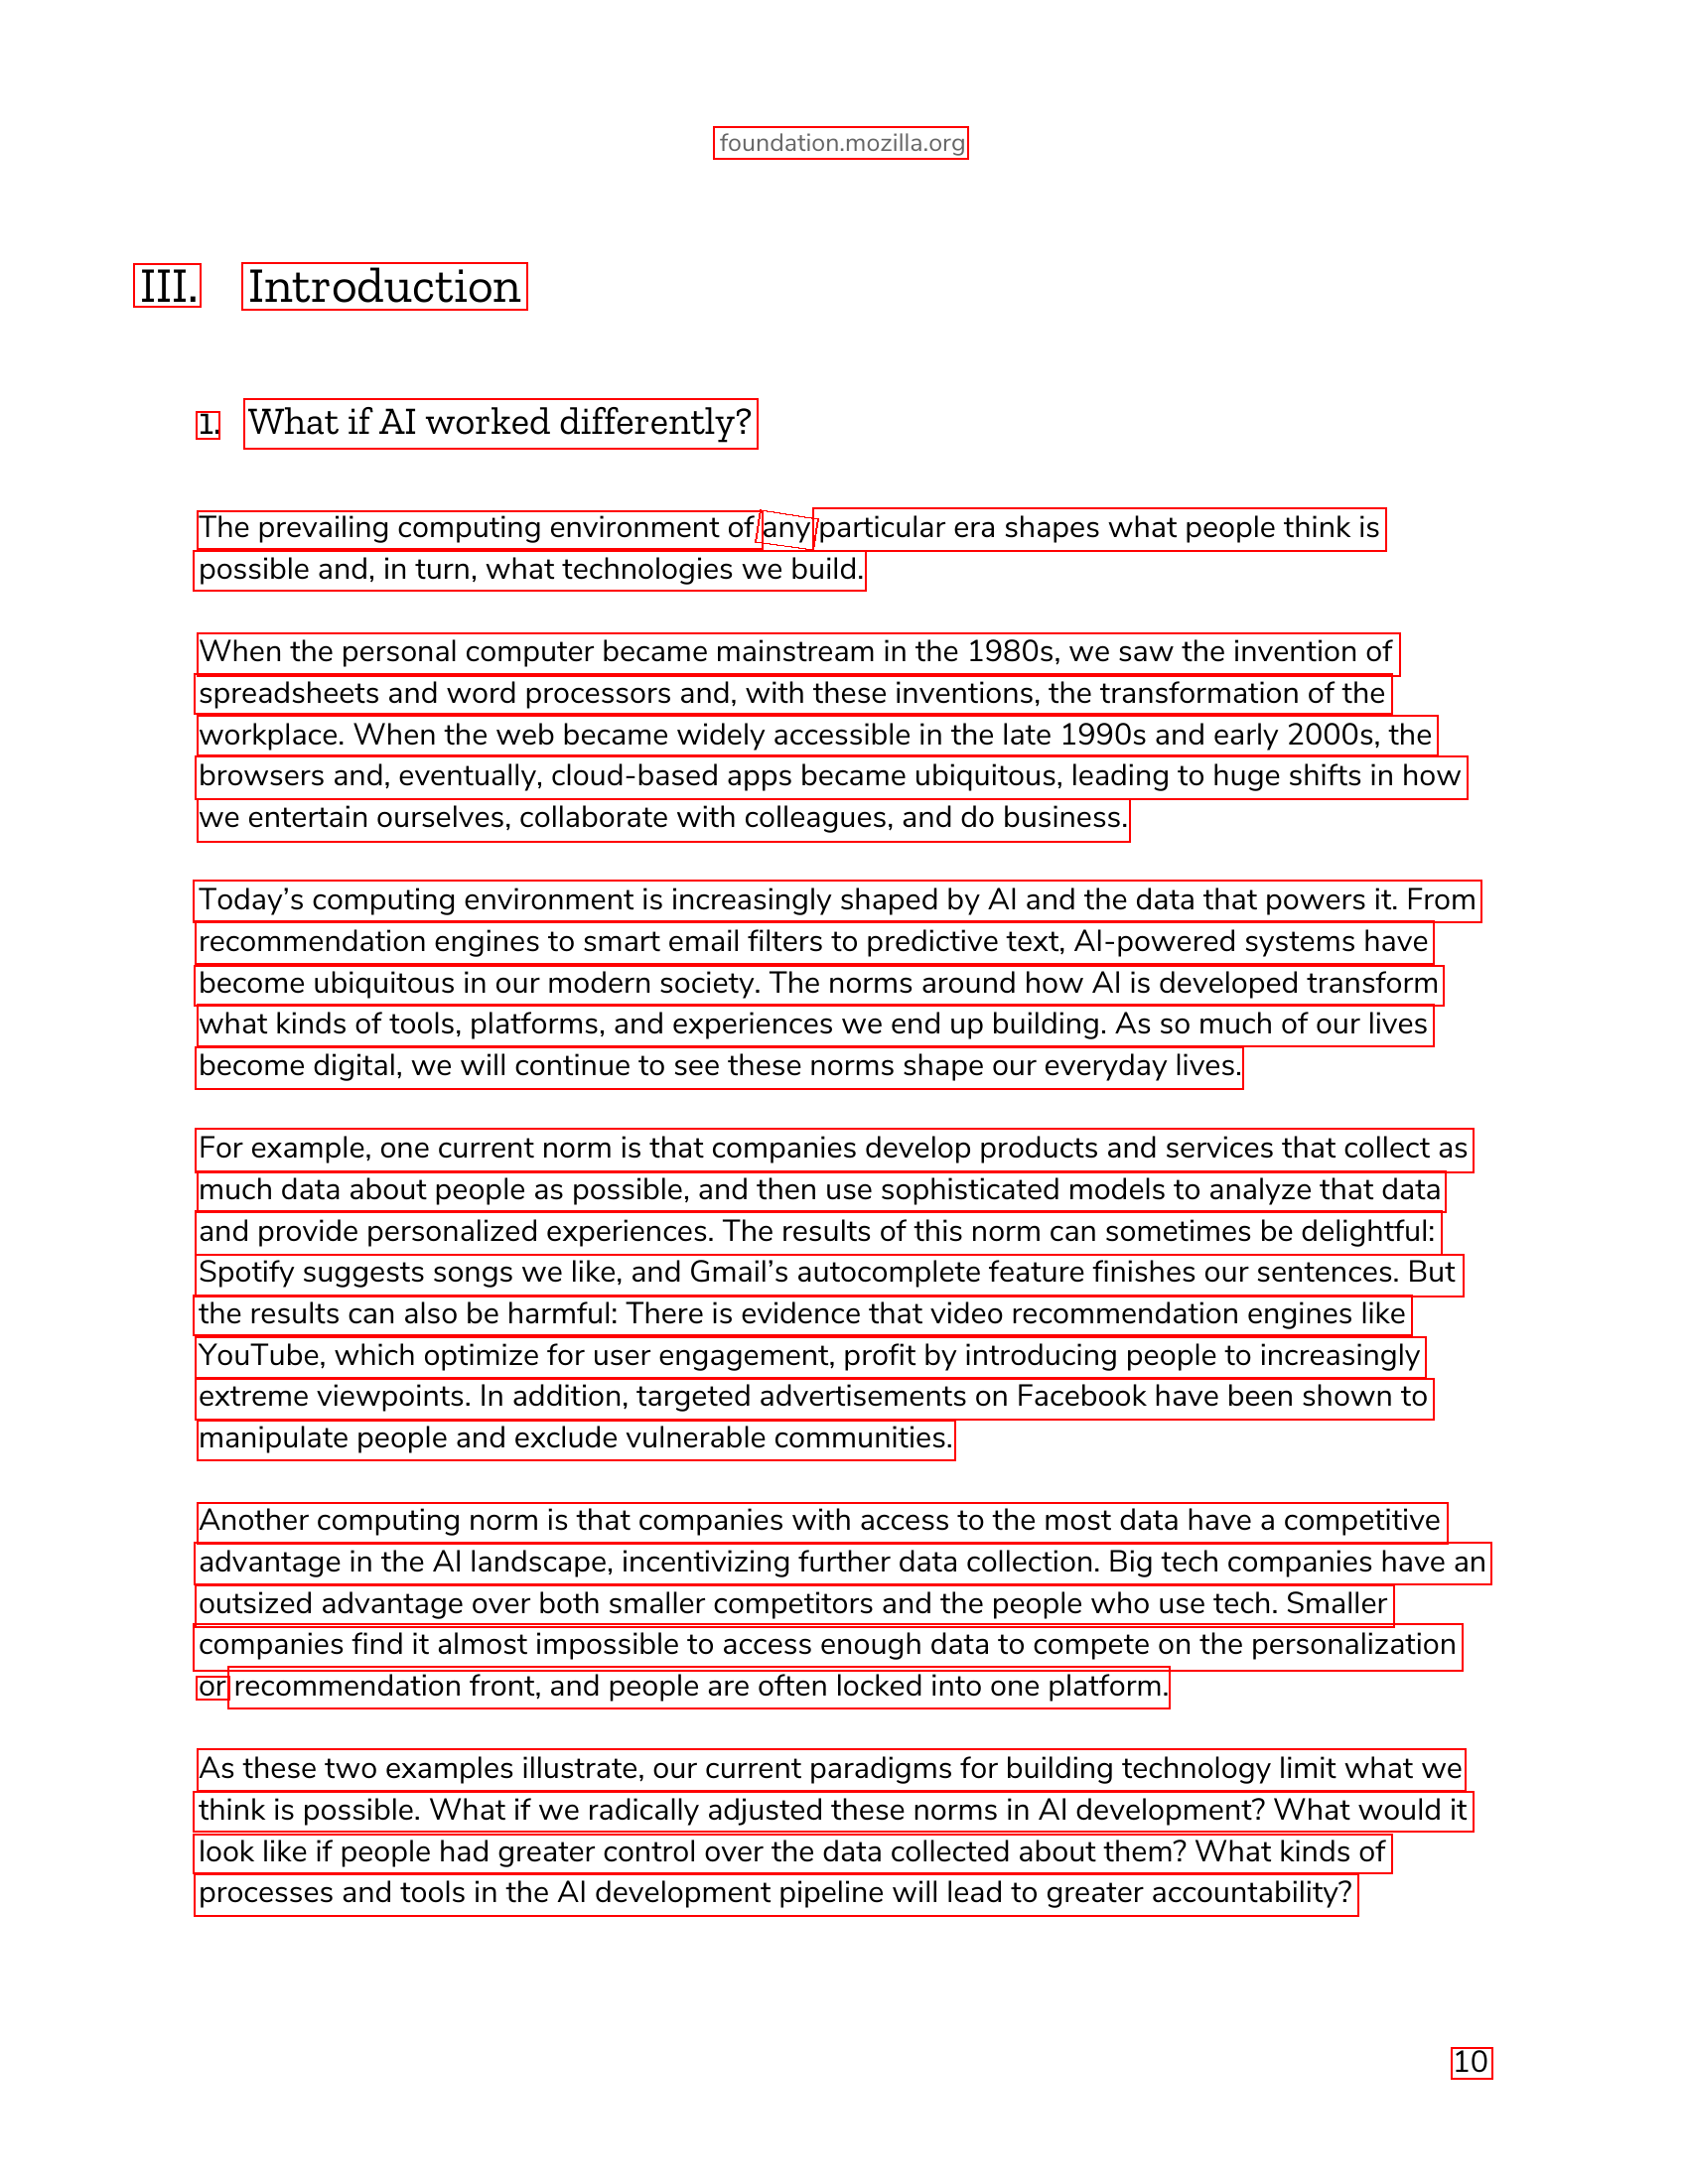

In [10]:
def draw_boxes(image, bounds, color='red', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0,p1,p2,p3=bound[0]
        draw.line([*p0,*p1,*p2,*p3,*p0],fill=color,width=width)
        
    return image

img = Image.open('page9.png')
draw_boxes(img, result)

In [11]:
len(result)

38

In [12]:
boxes = [x[0] for x in result] 

In [13]:
boxes

[[[719, 127], [974, 127], [974, 160], [719, 160]],
 [[244, 264], [530, 264], [530, 312], [244, 312]],
 [[135, 265], [201, 265], [201, 309], [135, 309]],
 [[246, 401], [762, 401], [762, 452], [246, 452]],
 [[198, 414], [220, 414], [220, 442], [198, 442]],
 [[819, 511], [1395, 511], [1395, 555], [819, 555]],
 [[766.8713347040338, 513.1625379937149],
  [823.7368735447175, 522.5731937374715],
  [818.1286652959662, 554.8374620062851],
  [761.2631264552825, 546.4268062625285]],
 [[199, 514], [767, 514], [767, 553], [199, 553]],
 [[195, 554], [871, 554], [871, 595], [195, 595]],
 [[199, 637], [1409, 637], [1409, 681], [199, 681]],
 [[196, 678], [1401, 678], [1401, 719], [196, 719]],
 [[199, 720], [1447, 720], [1447, 761], [199, 761]],
 [[197, 761], [1477, 761], [1477, 805], [197, 805]],
 [[199, 804], [1137, 804], [1137, 848], [199, 848]],
 [[195, 886], [1491, 886], [1491, 929], [195, 929]],
 [[197, 927], [1443, 927], [1443, 971], [197, 971]],
 [[196, 972], [1453, 972], [1453, 1013], [196, 101

In [14]:
for box in boxes:
    print(box)

[[719, 127], [974, 127], [974, 160], [719, 160]]
[[244, 264], [530, 264], [530, 312], [244, 312]]
[[135, 265], [201, 265], [201, 309], [135, 309]]
[[246, 401], [762, 401], [762, 452], [246, 452]]
[[198, 414], [220, 414], [220, 442], [198, 442]]
[[819, 511], [1395, 511], [1395, 555], [819, 555]]
[[766.8713347040338, 513.1625379937149], [823.7368735447175, 522.5731937374715], [818.1286652959662, 554.8374620062851], [761.2631264552825, 546.4268062625285]]
[[199, 514], [767, 514], [767, 553], [199, 553]]
[[195, 554], [871, 554], [871, 595], [195, 595]]
[[199, 637], [1409, 637], [1409, 681], [199, 681]]
[[196, 678], [1401, 678], [1401, 719], [196, 719]]
[[199, 720], [1447, 720], [1447, 761], [199, 761]]
[[197, 761], [1477, 761], [1477, 805], [197, 805]]
[[199, 804], [1137, 804], [1137, 848], [199, 848]]
[[195, 886], [1491, 886], [1491, 929], [195, 929]]
[[197, 927], [1443, 927], [1443, 971], [197, 971]]
[[196, 972], [1453, 972], [1453, 1013], [196, 1013]]
[[199, 1011], [1443, 1011], [1443, 

In [19]:
list_of_h = []
def calculate_line_height(boxes):
    # param img is List Object containing bounding boxes
    # return is an int 
    height_acc = 0
    for box in boxes:
        curr_line_h = ((box[2][1]) - box[1][1])
        # calculate the difference in Y values to get the hieght
        # print(curr_line_h)
        list_of_h.append(curr_line_h)
        height_acc = height_acc + curr_line_h
        
    return int(height_acc/len(boxes))

calculate_line_height(boxes)

41

In [17]:
max_num = max(list_of_h)
max_num

51

In [18]:
min_num = min(list_of_h)
min_num

24